# Modelagem do Risco
## 1. Propriedades dos Retornos

Imports Básicos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Séries temporais de ativos financeiros são conjuntos de dados que representam o comportamento de preços, volumes de negociação, retornos ou outras características de um ativo financeiro ao longo do tempo. Esses ativos podem incluir ações, títulos, commodities, moedas ou qualquer outro instrumento financeiro negociado em um mercado. Elas são de interesse essencial para quem atua no mercado financeiro, pois descrevem o comportamento de um ativo ao longo do tempo, como sua têndencia, volatilidade, etc. Para os exemplos desse notebook, usarei de exemplo o preço de fechamento do IBOV. Abaixo, como utilitário, deixo o código de como salvar os preços a partir da API do Yahoo Finance.

In [3]:
import yfinance

your_filepath = ""
df_ibov = yfinance.download('^BVSP')
# df_ibov.to_excel(fr'{your_filepath}\FinancialEconometrics\Risk Modelling\Data\Ibov.xlsx'

[*********************100%%**********************]  1 of 1 completed


Abaixo, realizo um slice do DataFrame para considerar apenas o preço de fechamento e crio uma visualização temporal do preço de fechamento do IBOV com o horizonte de dados desde 2001. A série expressa neste formato é chamada de **série em nível**.

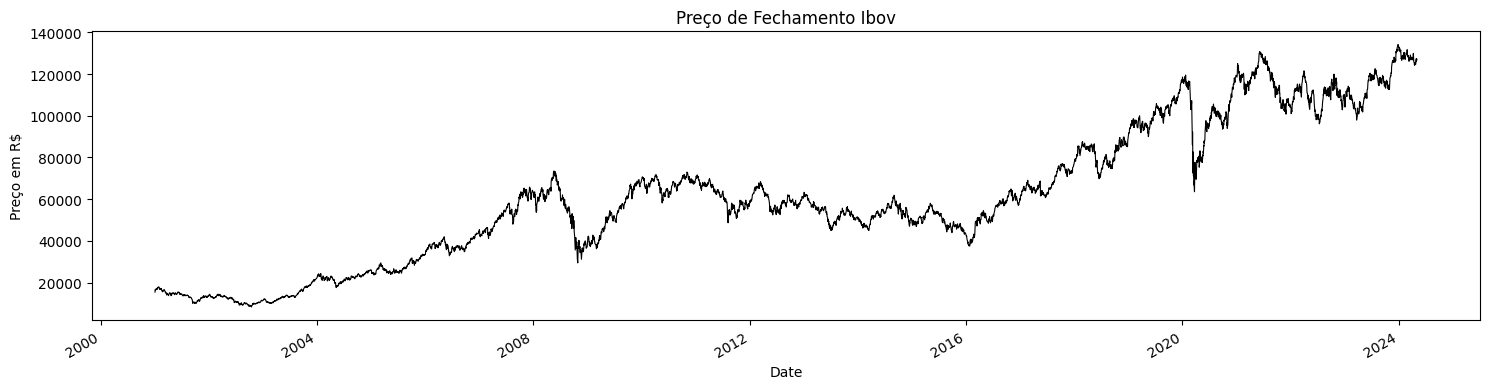

In [4]:
ibov = df_ibov['Close']['2001':]
ibov.to_excel(fr'C:\Users\vnaza\OneDrive\Documentos\Projetos\Estudos Diversos\FinancialEconometrics\Risk Modelling\Data\Ibov.xlsx')
ibov.plot(figsize=(15,4), lw=.8, c='k')
plt.title('Preço de Fechamento Ibov')
plt.ylabel('Preço em R$')
plt.tight_layout()

Com essa visualização é possível observar que houveram momentos de queda expressiva como em 2008 (devido a crise do subprime) e em 2020 devido a pandemia. Se for de interesse do cientista é possível modelar essa série diretamente no intuito de realizar previsões futuras ou inferência sob possíveis fatores que afetam a dinâmica. Isto no entanto está de fora do escopo desse estudo. Séries em nível em geral são não-estacionárias (covâriancia-estacionárias) e por isso são difíceis de serem modeladas. Como o interesse desta série é analisar a volatilidade ou risco de um ativo, a opção indicada é transformar a série em nível para a série de **retornos**.

Retornos nada mais são que a variação no rendimento de um ativo ao longo do tempo. Por exemplo, suponha que um investidor comprou uma ação a R$100 no instante t = 0 e que esse ativo subiu para R$110 e R$95 nos períodos consecutivos. Os retornos são a representação da variação do valor investido no tempo, ou seja, em t=1 o retorno foi positivo e em t=2 o retorno foi negativo.  Neste contexto existem duas possíveis formulações para o cálculo dos retornos: simples (aritméticos) e logarítmicos. Abaixo segue uma breve explicação sobre cada formulação e algumas vantagens ao se utilizar a forma em log.

Retornos simples ($R_t^S$):
$$
R_t^S = \frac{P_t}{P_{t-1}} -1
$$

Retornos Logarítmicos ($R_t^L$):
$$
R_t^S = \ln(\frac{P_t}{P_{t-1}}) = \ln(P_t) - \ln(P_{t-1})
$$

Observações:
- Retornos Simples medem a variação absoluta no preço do ativo.
- Retornos Logarítmicos ou Log Retornos medem a variação relativa no preço do ativo.

Vantagens do log retorno:
- Os retornos logarítmicos podem ser interpretados como retornos continuamente compostos.
- Ao considerar retornos de vários períodos, o log retorno períodos é simplesmente a soma dos log retornos. 

No decorrer desse estudo, usarei o log retorno como a forma padrão no cálculo dos retornos e irei me referir a ele simplesmente como retorno ($r_t$).


A seguir decorre o cálculo dos retornos e visualização do IBOV

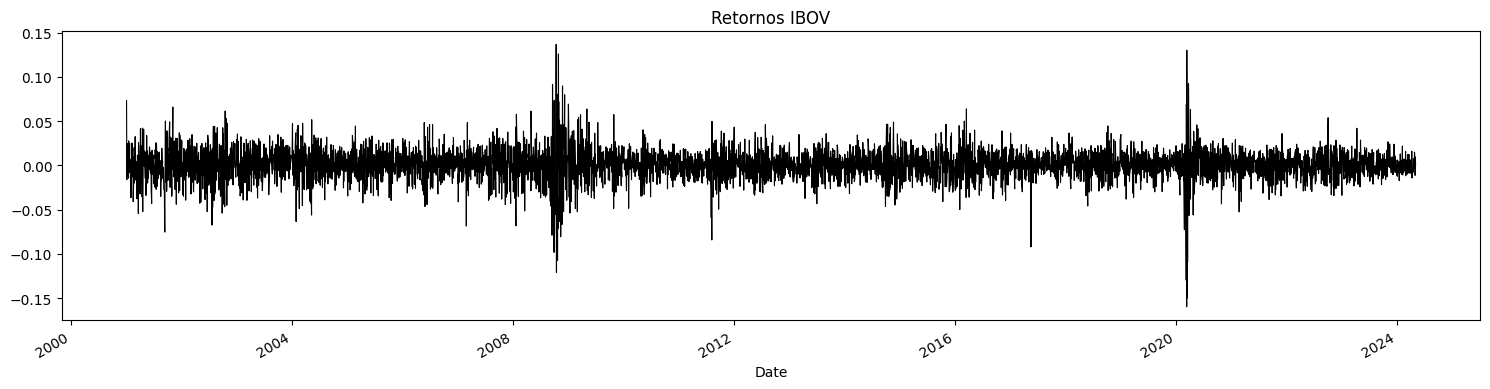

In [5]:
ribov = np.log(ibov).diff().dropna()
def plot_ribov():
    ribov.plot(figsize=(15,4), lw=.8, c='k')
    plt.title('Retornos IBOV')
    plt.tight_layout()
plot_ribov()

#### Média

Pela visualização do Gráfico decorrem imeadiamente alguns fatos. Primeiro a média ($\bar{r}$) dos retornos é (muito próxima) de 0. Podemos realizar esse cálculo de forma empírica, segue:

In [6]:
print('Média dos Retornos do IBOV:', ribov.mean().round(4))

Média dos Retornos do IBOV: 0.0004


Por isso tem-se que:

$$ E({r_t}) = 0$$

#### Variância

Outro fato importante pode ser observado: existem agrupamentos onde os retornos parecem ter maior volatilidade. Particularmente as quedas em 2008 e 2020, como visto no gráfico em nível, estão associados a maior volatiladidade dos retornos do IBOV. Este fenômeno de agrupamento é chamado de *cluster de volatilidade* e indica algo muito importante: **a volatilidade é variante no tempo**. 

Inicialmente para medir a volatilidade da série, utilizaremos a variância ($\bar{\sigma}^2$) ou desvio padrão ($\bar{\sigma}$) não-condicional dos retornos.

In [7]:
print('Variância dos Retornos do IBOV:', ribov.var().round(4))
print('Desvio Padrão dos Retornos do IBOV:', ribov.std().round(4))

Variância dos Retornos do IBOV: 0.0003
Desvio Padrão dos Retornos do IBOV: 0.0173


Como veremos, essas medidas não são as mais adequadas para mensuração da volatilidade, pois a variância dos retornos é dependente no tempo. Isso ocorre justamente porque os períodos ou instantes da série com alta volatilidade tendem a permanecer assim. Uma maneira de observarmos a variância como variante no tempo é elevarmos os retornos do ativo ao quadrado $r_t^2$. Podemos derivar o por que desta transformação rapidamente. Dada a fórmula da Variância com o operador da esperança:

$$Var(r_t) = E(r_t - \bar{r}_t)^2$$
$$\Rightarrow E(r_t^2) - E(r_t)^2$$
$$\text{Como } E(r_t) = 0 $$
$$Var(r_t) = E(r_t^2)$$


Abaixo plota-se o gráfico dessa transformação que ilustra muito bem o efeito de persistência na variância dos retornos. 

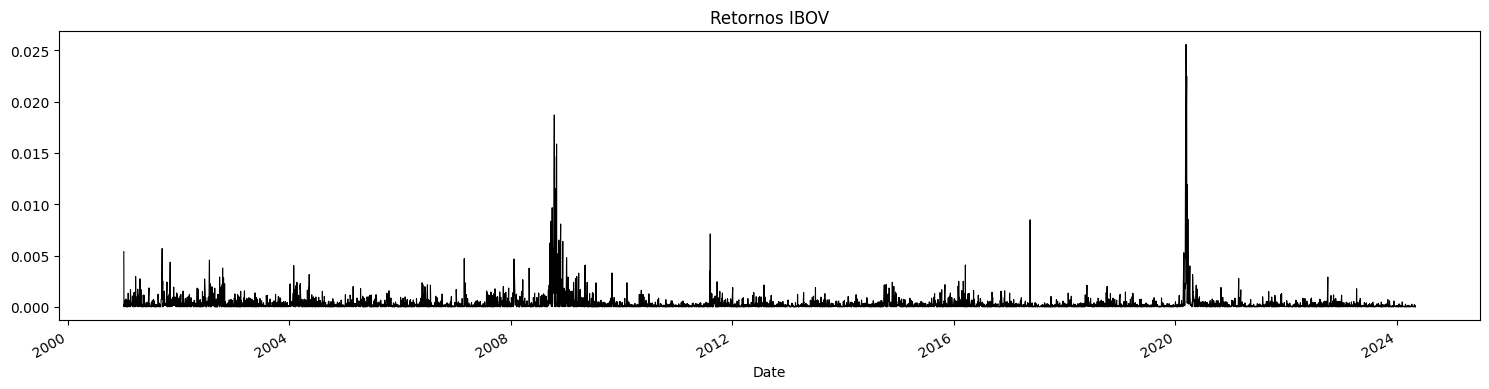

In [8]:
ribov2 = ribov**2
ribov2.plot(figsize=(15,4), lw=.8, c='k')
plt.title('Retornos IBOV')
plt.tight_layout()

#### Autocorrelação

Novamente, é possível notar que quando a variância está alta ela tende a permanecer alta. Isso nos sugere a existência de **autocorrelação** na série dos retornos ao quadrado. Uma maneira de visualizar esta relação de correlação é construir o correlograma ou função de autocorrelacão (FAC) das autocorrelações das defasagens do $r_t^2$. 


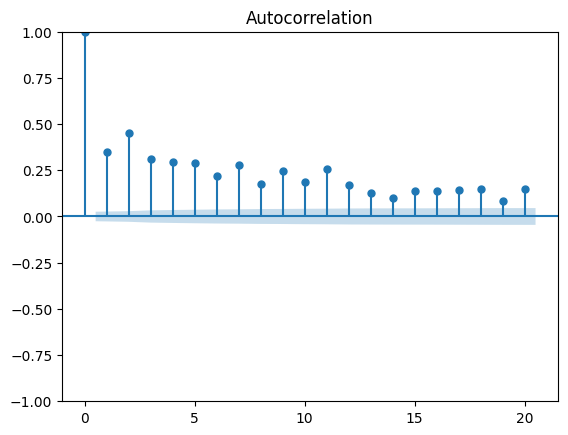

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
_ = plot_acf(ribov2, lags= 20)

Perceba que no gráfico, todas as defasagens são significativas em termos estatísticos, estando acima do intervalo de confiança de 95% (padrão da biblioteca). 

Embora a variância nos dê um importante insight sobre a dinâmica da variação da série, uma maneira para obtermos uma medida mais direta e comportada da volatilidade é tomarmos a raiz quadrada da série de retornos ao quadrado que é exatamento os retornos em módulo.

$$\sigma_t^o = \sqrt{r_t^2} = |r_t|$$

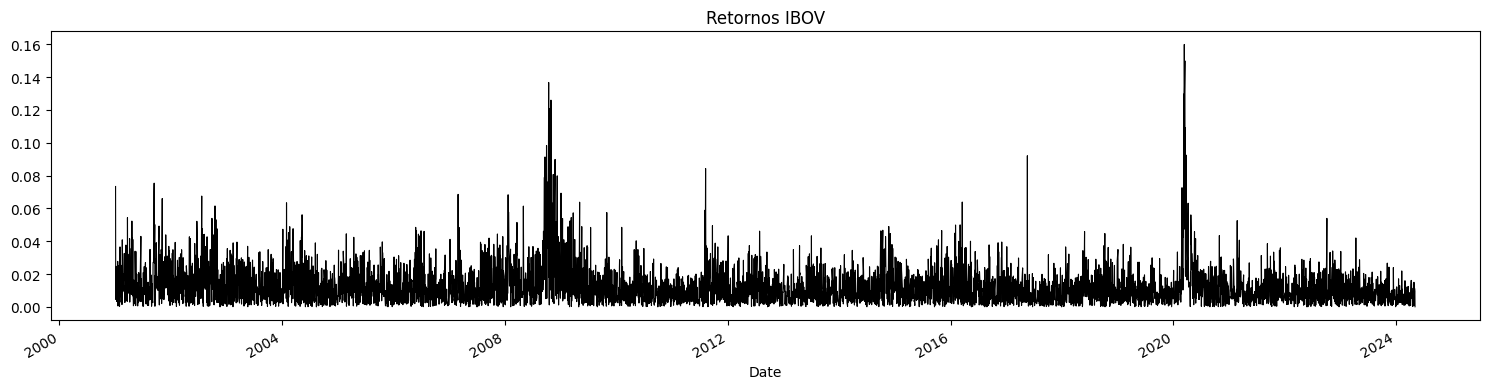

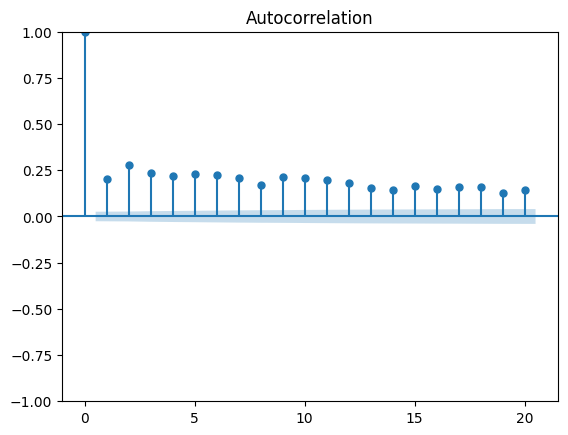

In [10]:
(ribov2**(1/2)).plot(figsize=(15,4), lw=.8, c='k')
plt.title('Retornos IBOV')
plt.tight_layout()
_ = plot_acf((ribov2**(1/2)), lags= 20)


Com base no gráfico da FAC, novamente as autocorrelações são significantes estatísticamente. 

**Importante:**

A função de autocorrelção da série de retornos ao quadrado é diferente da função de autocorrelção da série de retornos em módulo

$$FAC(r_t^2) \neq FAC(|r_t|)$$

Isso por que as tranformações sobre as séries de retorno são não-lineares!

Uma outra forma de se analisar se uma série tem autocorrelação é realizar o teste conjunto de Ljung-Box, muito utilizado na análise de diagnóstico de modelos re regressão. O teste tem as seguintes hipóteses, sendo $\rho_t$ autocorrelação amostral dos retornos: 

$$ H1: \rho_1 = \rho_2 = ... = \rho_n = 0$$
$$ H1: \rho_1 , \rho_2 , ... , \rho_n \neq 0$$


In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

r2pvalue = acorr_ljungbox(ribov2)
modpvalue = acorr_ljungbox(abs(ribov))

print('p-valor do teste de Ljung-Box de r_t^2:', r2pvalue.iloc[1, -1])
print('p-valor do teste de Ljung-Box de |r_t|:', modpvalue.iloc[1, -1])

p-valor do teste de Ljung-Box de r_t^2: 0.0
p-valor do teste de Ljung-Box de |r_t|: 1.5443826204580911e-149


Para ambos os casos o p-valor do teste é muito pequeno. Por esse motivo rejeita-se a hipótese conjunta nula de que todas as autocorrelações = 0 até a defasagem $n$, ou seja, neste caso, ambas as formas apresentam correlação serial.

**Nota**: Verificamos a extistência de dependência temporal nas séries do retorno ao quadrado e em módulo, porém os retornos em **nível** são não auto-correlacionados! Abaixo se encontra o gráfico da FAC e do teste de Ljung-Box sobre os retornos em nível.

p-valor do teste de Ljung-Box de r_t: 0.1039154679041284 -> Não rejeitamos a H0 (alpha = .05)


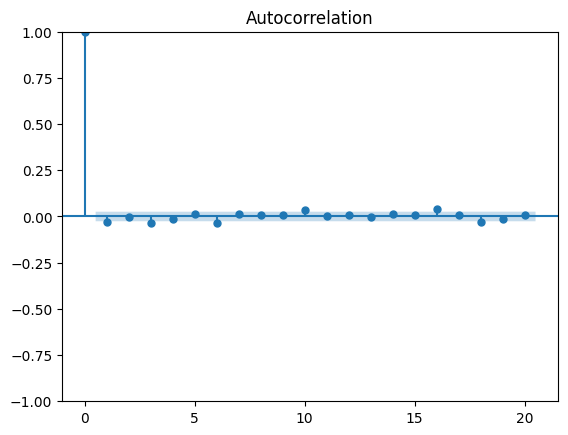

In [12]:
rpvalue = acorr_ljungbox(ribov)
print('p-valor do teste de Ljung-Box de r_t:', rpvalue.iloc[1, -1], '-> Não rejeitamos a H0 (alpha = .05)')
_ = plot_acf(ribov, lags=20)


#### Estacionariedade

Assim sendo, temos algumas informações muito relevantes sobre a dinâmica da séries dos retornos: sabemos que a média é constante é invariante no tempo ($\bar{r} \approx 0$), a variância é finita e que a série em nível não apresenta autocorrelação. Isto nos indica que a série de retornos em nível é fracamente estacionária! Caso não se recorde, uma série é estacionária se a sua esperança e autocovariância forem invariantes no tempo (Além do segundo momento da distribuição também ser finito). Segue:

$\{y_t, t \in \Z\}$ é fracamente estacionário se 

$$E(y_t) = \mu $$
$$E|y_t|^2 < \infty \text{  or  } E(y_t - \mu)^2 < \infty$$
$$E(y_t - \mu)(y_{t-j} - \mu) = \gamma_j $$ 


Com base na definição acima diz-se que a série dos retornos é fracamente estacionária. Para sermos mais rigorosos, podemos implementar o teste de Dickey-Fuller Aumentado (ADF) para testar a estacionariedade da série. Não entrarei no detalhe da formulação do teste, assim como os anteriores. Basicamente, no teste ADF a hipótese nula é que o processo gerador da série temporal tenha uma raiz unitária, o que por sua vez indica que a série é não-estacionária.

$$
H0: Não-Estacionária \\
H1: Estacionária
$$

In [13]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ribov, maxlag=20, regression='n')

print(f'ADF p-value: {adf_test[1]}')
print('A série é estacionária')

ADF p-value: 2.5379282416941544e-28
A série é estacionária


#### Distribuição não Normal

Até este ponto vimos como a média e a variância da série de retornos se comportam, no entanto restam algumas propriedades em função da distribuição dos retornos. Muitos autores consideram que a distribuição dos retornos é equivalente a uma de uma distribuiução normal. De fato, podemos utilizar a normal para modelar essas séries, mas eles efetivamente se distanciam da distribuição gaussiana. Isso occore pois séries de retornos apresentam Assimetria (*skewness*) e Curtose (*Kurtosis*) que são diferentes de uma normal. Sabemos que uma distribuição Normal tem assimetria = 0 e curtose = 3. Veremos como são estes valores na série de retornos.

In [14]:
df_moments = pd.DataFrame({
    'Mean': [ribov.mean()],
    'Standard Deviation': [ribov.std()],
    'Skewness': [stats.skew(ribov)],
    'Kurtosis': [stats.kurtosis(ribov)]
    })
df_moments.round(2)


,Mean,Standard Deviation,Skewness,Kurtosis
0,0.0,0.02,-0.36,7.22


Com base nas estatísticas apresentadas, observamos que a assimetria da série de retornos é próxima de zero, indicando uma pequena assimetria negativa. No entanto, a curtose é evidentemente maior que 3, com um excesso de curtose de $4,22$. O que isso significa na prática? Com a assimetria estimada próxima de 0, podemos considerar a série como simétrica, embora isso nem sempre seja verdadeiro. Por exemplo, os retornos de fundos de hedge geralmente têm uma assimetria negativa, o que sugere que retornos positivos são mais frequentes. Já a curtose muito acima de 3 indica uma maior probabilidade de eventos extremos, tanto positivos quanto negativos, do que o esperado em uma distribuição normal e isso é um fenômeno que é recorrente nas séries de retorno. Este fato é crucial para o **gerenciamento de riscos**, pois uma maior probabilidade de perdas extremas deve ser levada em conta na análise de investimentos. 

Abaixo segue o histograma da distribuição da série de retornos observados do IBOV. É válido dizer que o atributo `density` é setado como `True` pois o gráfico gerado será uma aproximação da **função de distribuição de probabilidade** (pdf) da série. Além do histograma da série, também plotarei uma simulação com a distribuição normal, para fins de comparação.

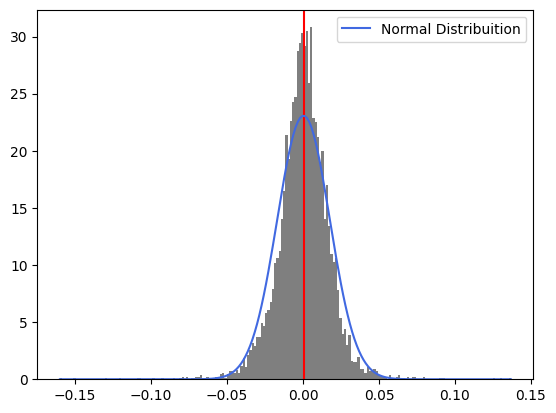

In [15]:
ribov.hist(density=True, bins = 200, grid=False, color='k', alpha=0.5)
plt.axvline(ribov.mean(), c='red')

x = np.linspace(ribov.min(), ribov.max(), num=200)
plt.plot(x, stats.norm.pdf(x, ribov.mean(), ribov.std()), color='royalblue', label ='Normal Distribuition')
plt.legend()

É notável que a distribuição dos retornos do IBOV não segue uma distribuição Normal, o que tem levado à utilização frequente da distribuição t na modelagem desses retornos, devido às suas caudas mais longas, o que a torna mais adequada para modelar eventos extremos. Além disso, outras distribuições, como a Skew-Normal ou Skew-t, que incorporam um parâmetro de assimetria, também são utilizadas para esse fim. Abaixo segue a comparação das distribuições Normal e t, juntamente com a série dos retornos.

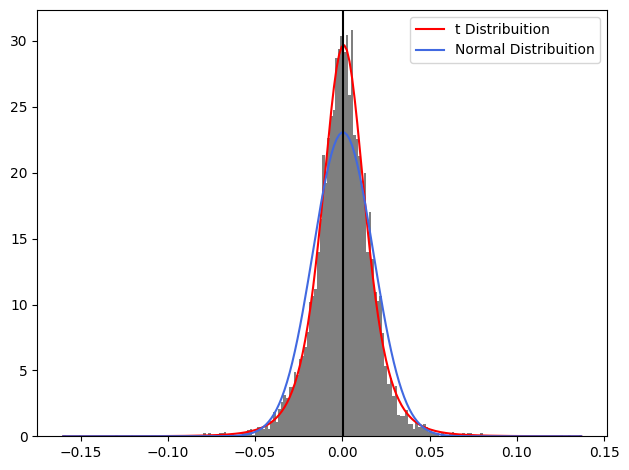

In [16]:
# plt.figure(figsize=(8,5))
x = np.linspace(ribov.min(), ribov.max(), num=200)

ribov.hist(density=True, bins = 200, grid=False, color='k', alpha=0.5)

tdf, tmu, tsigma = stats.t.fit(ribov)
plt.plot(x, stats.t.pdf(x,tdf, tmu, tsigma), color='red', label ='t Distribuition')

plt.plot(x, stats.norm.pdf(x, ribov.mean(), ribov.std()), color='royalblue', label ='Normal Distribuition')

plt.axvline(ribov.mean(), c='k')
plt.legend()
plt.tight_layout()

### Resumo

Podemos resumir as propriedades dos retornos da seguinte forma

1. **Média próxima de zero**: A esperança dos retornos será 0 ~ $E(r_t) = 0$
2. **Variância não constante**: A volatilidade dos retornos varia ao longo do tempo, formando períodos de alta e baixa volatilidade.
3. **Ausência de Autocorrelação em nível**: Os retornos em nível não têm correlação serial, ou seja, o retorno atual não é influenciado pelo retorno passado.
4. **Os Quadrados são Autocorrelacionados**: Os quadrados dos retornos são autocorrelacionados, indicando que momentos de alta e baixa volatilidade ($r_t^2$) tendem a se agrupar, são os chamados de clusters de volatilidade.
5. **Estacionariedade fraca**: Os retornos exibem estacionariedade fraca, o que significa que a média e autocorrelação são invariantes no tempo.
6. **Caudas pesadas**: A distribuição dos retornos tem caudas mais espessas ou pesadas do que a distribuição normal, o que significa que eventos extremos são mais prováveis do que o esperado pela distribuição normal.


#### Referências



ENDERS, W. Applied Econometric Time Series. 4th Edition. Hoboken, NJ:John Wiley & Sons, 2015. Cap. 3.

RUPPERT, D. Statistics and Data Analysis for Financial Engineering. Springer, 2015. Cap. 2

JONDEAU, E. POON, S. and ROCKINGER M. Financial modeling under non-gaussian distributions. Springer Finance Springer, 2007. Cap. 2

HUDSON, R. and GREGORIU, A. Calculating and Comparing Security Returns is Harder than you Think: A Comparison between Logarithmic and Simple Returns. Elsevier, 2010 

ZIVOT, E. Introduction to Computational Finance and Financial Econometrics. Cap. 5
